Привет!

Нам предоставлены данные о использовании такси разных классов и на разную дистанцию. Наша цель - проверить выдвинутую гепотезу о том, что люди на более длинные поездки предпочитают использовать комфорт класс.

**Начнем с обзора**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [ ]:
df = pd.read_excel('FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [ ]:
df_com=df[df['offer_class_group'] == 'Comfort']
df_eco=df[df['offer_class_group'] == 'Economy']

print('Выборки имеют одинаковую длинну', len(df_com) == len(df_eco))

Выборки имеют одинаковую длинну True


**Описательная статистика для обеих выборок**

In [ ]:
df_com.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,465289.002000,4.106000,22.943699,29.758910,0.486000
std,272443.226582,1.968378,4.842951,17.644643,0.500305
min,2710.000000,1.000000,15.496198,0.024259,0.000000
25%,232141.250000,2.000000,19.430402,16.345205,0.000000
50%,475479.000000,4.000000,21.704980,28.078273,0.000000
75%,697329.750000,6.000000,25.120825,41.300650,1.000000
max,918656.000000,7.000000,50.206056,81.507022,1.000000


In [ ]:
df_eco.describe()

,order_gk,weekday_key,hour_key,distance_km,driver_response
count,500.00000,500.000000,500.000000,500.000000,500.000000
mean,463448.91200,3.896000,22.165311,26.283117,0.422000
std,274029.66119,1.989246,4.063839,17.016153,0.494373
min,3845.00000,1.000000,14.899553,0.089947,0.000000
25%,226962.50000,2.000000,19.006174,13.372229,0.000000
50%,455884.50000,4.000000,21.257715,23.798183,0.000000
75%,721415.75000,6.000000,24.402652,36.845287,1.000000
max,919196.00000,7.000000,39.185553,90.516618,1.000000


**Визуализация и первичные выводы**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


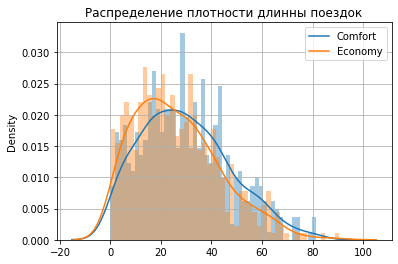

In [ ]:
sns.distplot(df_com['distance_km'], 50)
sns.distplot(df_eco['distance_km'], 50)
plt.title('Распределение плотности длинны поездок')
plt.legend(['Comfort', 'Economy'])
plt.grid()
plt.xlabel('')
plt.show ()

Text(0.5, 0, 'Дистанция поездки')

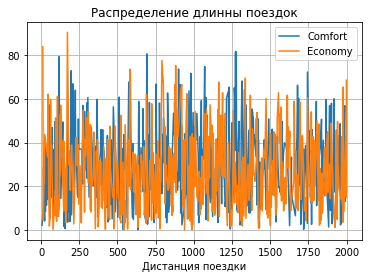

In [ ]:
plt.plot(df_com['distance_km']) 
plt.plot(df_eco['distance_km'])
plt.grid()
plt.title('Распределение длинны поездок')
plt.legend(['Comfort', 'Economy'])
plt.xlabel('Дистанция поездки')

Распределение у обоих вариантов нормальное, друг от друга отличаются не значительно, можно визуально ометить что на бОльших дистанциях действительно превалирует комфорт-класс

**Стат анализ и проверка гипотез**

In [ ]:
#T-Критерий Стьюдента
alpha=0.05
result=ttest_ind(df_com['distance_km'], df_eco['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

p-value: 0.00156751
Отвергаем нулевую гипотезу


Т-Крит. Стьюдента сообщает нам, что выборки отличаются

In [ ]:
#Пробуем через критерий Манна-Уитни
result = mannwhitneyu(df_com['distance_km'], df_eco['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

p-value: 0.00128491
Отвергаем нулевую гипотезу


Манн-Уитни с ним соледарен

На основе первичного анализа и последующего подсчета Т-критерия и критерия Манна-Уитни можем сделать вывод, что на длинных дистанциях поездки пользователи такси предпочитают использовать комфорт-класс.

Меня заинтересовал столбец факта выполнения поездки - попробуем произвести анализ только по выполненным поездкам.

In [ ]:
df_resp=df[df['driver_response'] == True]
df_resp.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
4,2241,6,23.164958,20.436380,Premium,1
6,2710,4,23.825352,2.142234,Comfort,1
7,2911,7,19.491440,42.587786,Premium,1


In [ ]:
df_com_1=df_resp[df['offer_class_group'] == 'Comfort']
df_eco_1=df_resp[df['offer_class_group'] == 'Economy']

print('Выборки имеют одинаковую длинну', len(df_com) == len(df_eco))

Выборки имеют одинаковую длинну True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


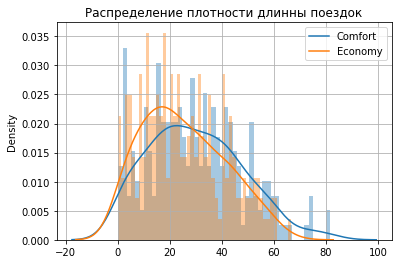

In [ ]:
sns.distplot(df_com_1['distance_km'], 50)
sns.distplot(df_eco_1['distance_km'], 50)
plt.title('Распределение плотности длинны поездок')
plt.legend(['Comfort', 'Economy'])
plt.grid()
plt.xlabel('')
plt.show ()

In [ ]:
#T-Критерий Стьюдента
alpha=0.05
result=ttest_ind(df_com_1['distance_km'], df_eco_1['distance_km'])
print('p-value: %.8f' % result.pvalue)

if (result.pvalue < alpha):
  print('Отвергаем нулевую гипотезу')
else:
  print('Не отвергаем нулевую гипотезу')

p-value: 0.00415126
Отвергаем нулевую гипотезу


Очищение от невыполненных поездок ситуацию не поменяло - пользователи на длинную дистанцию предпочитают комфорт-класс

Если анализировать исключительно выполненные поездки, то наш выбор в пользу альтернативной гипотезы только усиливается - p-value исполненных поездок значительно выше чем p-value в общей выборке. 
Можно констатировать, что пользовали предпочитают в длительных поездках использовать комфорт класс.